In [1]:
pip install tensorflow

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/377.0 MB 16.3 MB/s eta 0:00:24
   ---------------------------------------- 3.6/377.0 MB 45.6 MB/s eta 0:00:09
    --------------------------------------- 8.0/377.0 MB 72.6 MB/s eta 0:00:06
   - ------------------------------------- 12.8/377.0 MB 129.5 MB/s eta 0:00:03
   - ------------------------------------- 17.5/377.0 MB 131.2 MB/s eta 0:00:03
   -- ------------------------------------ 22.3/377.0 MB 131.2 MB/s eta 0:00:03
   -- ------------------------------------ 26.8/377.0 MB 131.2 MB/s eta 0:00:03
   --- ----------------------------------- 31.7/377.0 MB 131.2 MB/s eta 0:00:03
   --- -------------------------------

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer

In [3]:
dataf = pd.read_csv('ceramics_merged_cuboid.csv')

In [4]:
X = dataf[['rho','a','b','c', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
# dataf['E']=dataf['E']*10
# dataf['mu']= dataf['mu']*10000

Y = dataf[['E', 'nu']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [28]:
model = Sequential()
model.add(Dense(256, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(2))  # Output layer with 2 neurons for E and mu
from keras.optimizers import Adam

# Create an instance of the Adam optimizer with a specified learning rate
adam_optimizer = Adam(learning_rate=0.0001)
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)

Epoch 1/20


E:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13557/13557 ━━━━━━━━━━━━━━━━━━━━ 16s 989us/step - loss: 7987.8662 - val_loss: 808.2010
Epoch 2/20
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 13s 965us/step - loss: 917.4556 - val_loss: 774.8000
Epoch 3/20
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 748.7312 - val_loss: 572.1445
Epoch 4/20
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 670.4717 - val_loss: 502.7273
Epoch 5/20
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 576.0850 - val_loss: 675.4780
Epoch 6/20
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 538.0728 - val_loss: 615.4230
Epoch 7/20
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 504.8495 - val_loss: 407.3453
Epoch 8/20
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 463.9255 - val_loss: 422.5076
Epoch 9/20
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 442.4156 - val_loss: 402.3515
Epoch 10/20
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 417.0771 - val_loss: 512.9060
Epoch 11/20
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/st

In [29]:
# Predictions on the test set
from scipy import stats

y_pred  = model.predict(X_test)
# Calculate Mean Squared Error
mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

# Display the results
results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
# results_df['Actual_mu'] /= 10000
# results_df['Predicted_mu'] /= 10000
# results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()

import numpy as np

# Calculate median percentage error for E and mu
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
    # Calculate mode percentage error for E
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu'])

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
print(results_df)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error for E: 468.3000508450074
Mean Squared Error for mu: 0.007501370209591262
Median Percentage Error for E: 2.1800417767234825
Median Percentage Error for mu: 22.063132536779975
Mean Absolute Error for E: 14.984351220552732
Mean Absolute Error for mu: 0.07300860609014422
Standard Deviation for E: 15.616319062349067
Standard Deviation for mu: 0.04660478130480047
Mode Percentage Error for E: ModeResult(mode=0.00019635833991972346, count=1) 
Mode Percentage Error for E: ModeResult(mode=0.0002026557922400289, count=1) 
Mean Absolute percentage Error for E: 3.393565702449672
Mean Absolute percentage Error for mu: 29.316794912271064
      Actual_E  Predicted_E    Error_E  Actual_mu  Predicted_mu  Error_mu  \
0      798.060   795.044189   3.015811      0.362      0.299300  0.062700   
1      446.854   447.593506   0.739506      0.424      0.296493  0.127507   
2      754.042   750.284790   3.757210      0.177      0.293337  0.116337   
3  

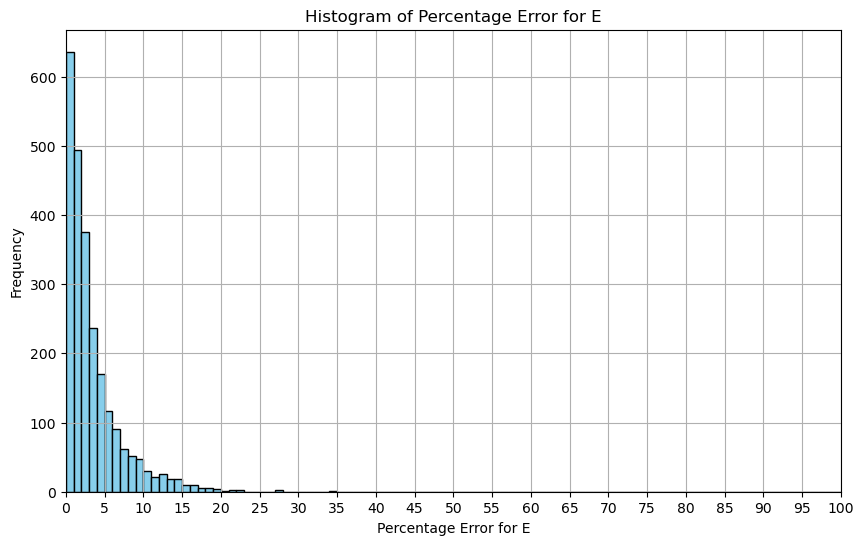

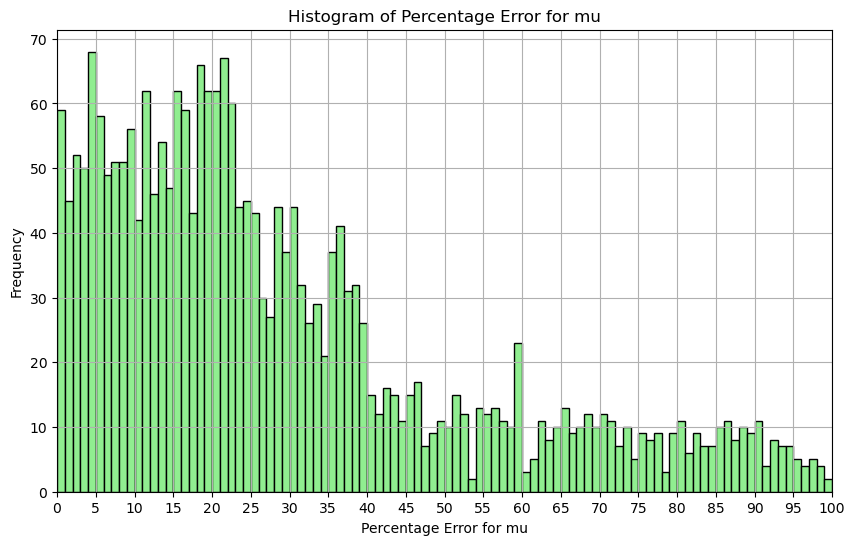

Maximum Percentage Error for E: 34.524453658511185
Minimum Percentage Error for E: 0.00019635833991972346
Maximum Percentage Error for mu: 103.83347738657567
Minimum Percentage Error for mu: 0.0002026557922400289


In [30]:
import matplotlib.pyplot as plt

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101,5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for mu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for mu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [18]:
import pickle

In [19]:
model_file_pickle = "Ceramics_ANN_model_no_scale_cuboid.pkl"
with open(model_file_pickle, 'wb') as file:
    pickle.dump(model, file)

In [23]:
with open(model_file_pickle, 'rb') as file:
    model1 = pickle.load(file)

In [24]:
y_pred_loaded_pickle = model1.predict(X_test)

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [25]:
y_pred_loaded_pickle

array([[8.0663171e+02, 4.7617435e-01],
       [4.3213208e+02, 3.8537645e-01],
       [7.4713165e+02, 4.6174848e-01],
       ...,
       [3.0595123e+02, 3.5478377e-01],
       [8.0128345e+02, 4.7487766e-01],
       [8.6976105e+02, 4.9148011e-01]], dtype=float32)

In [26]:
# Predictions on the test set
from scipy import stats

y_pred  = model.predict(X_test)
# Calculate Mean Squared Error
mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

# Display the results
results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
# results_df['Actual_mu'] /= 10000
# results_df['Predicted_mu'] /= 10000
# results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()

import numpy as np

# Calculate median percentage error for E and mu
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
    # Calculate mode percentage error for E
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu'])

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
print(results_df)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error for E: 118.55613955031141
Mean Squared Error for mu: 0.025101355841455997
Median Percentage Error for E: 0.8386605309775055
Median Percentage Error for mu: 44.066896877790754
Mean Absolute Error for E: 6.825812864331004
Mean Absolute Error for mu: 0.13396512105499206
Standard Deviation for E: 8.484926906553746
Standard Deviation for mu: 0.08460284667437301
Mode Percentage Error for E: ModeResult(mode=0.00010466536001578974, count=1) 
Mode Percentage Error for E: ModeResult(mode=0.003946961493615165, count=1) 
Mean Absolute percentage Error for E: 1.7492466082671254
Mean Absolute percentage Error for mu: 59.11083091370282
      Actual_E  Predicted_E    Error_E  Actual_mu  Predicted_mu  Error_mu  \
0      798.060   806.631714   8.571714      0.362      0.476174  0.114174   
1      446.854   432.132080  14.721920      0.424      0.385376  0.038624   
2      754.042   747.131653   6.910347      0.177      0.461748  0.284748   
3    

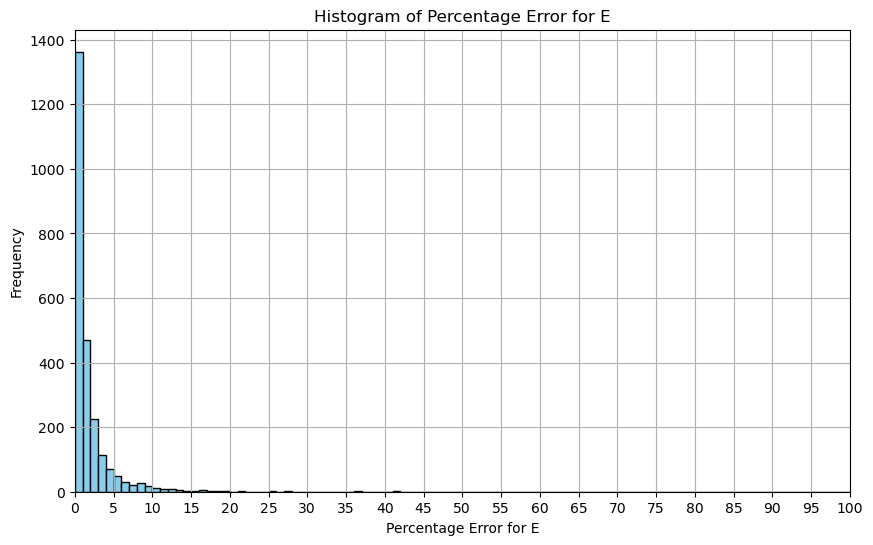

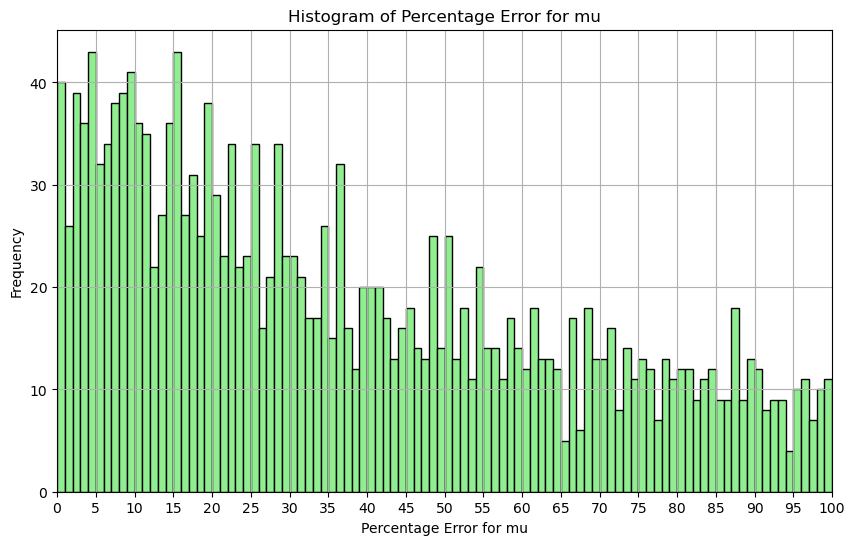

Maximum Percentage Error for E: 41.91437231810096
Minimum Percentage Error for E: 0.00010466536001578974
Maximum Percentage Error for mu: 230.6892533965458
Minimum Percentage Error for mu: 0.003946961493615165


In [27]:
import matplotlib.pyplot as plt

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101,5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for mu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for mu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')